In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Exploration:

#### Loading dataset

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Visualizations

##### Histograms

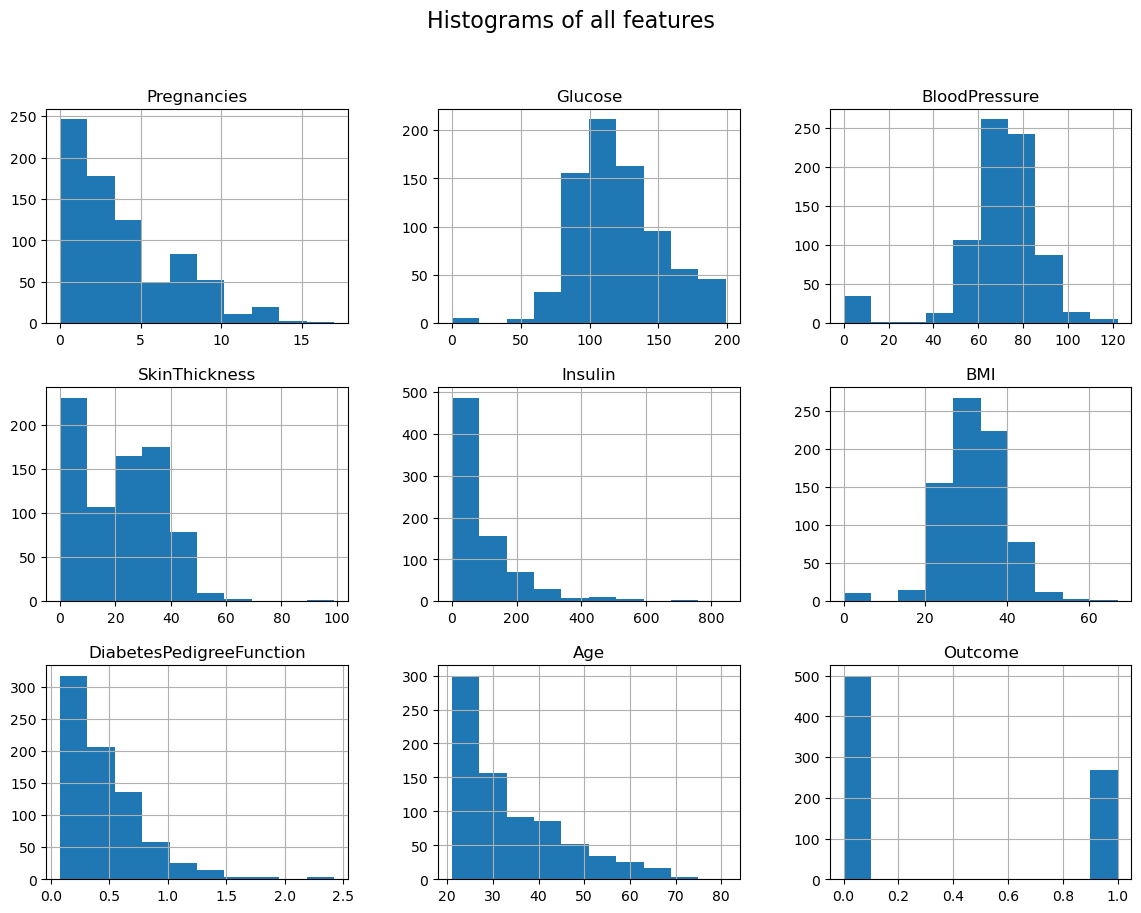

In [6]:
df.hist(figsize=(14,10))
plt.suptitle("Histograms of all features", fontsize=16)
plt.show()

###### Box Plots (to detect outliers)

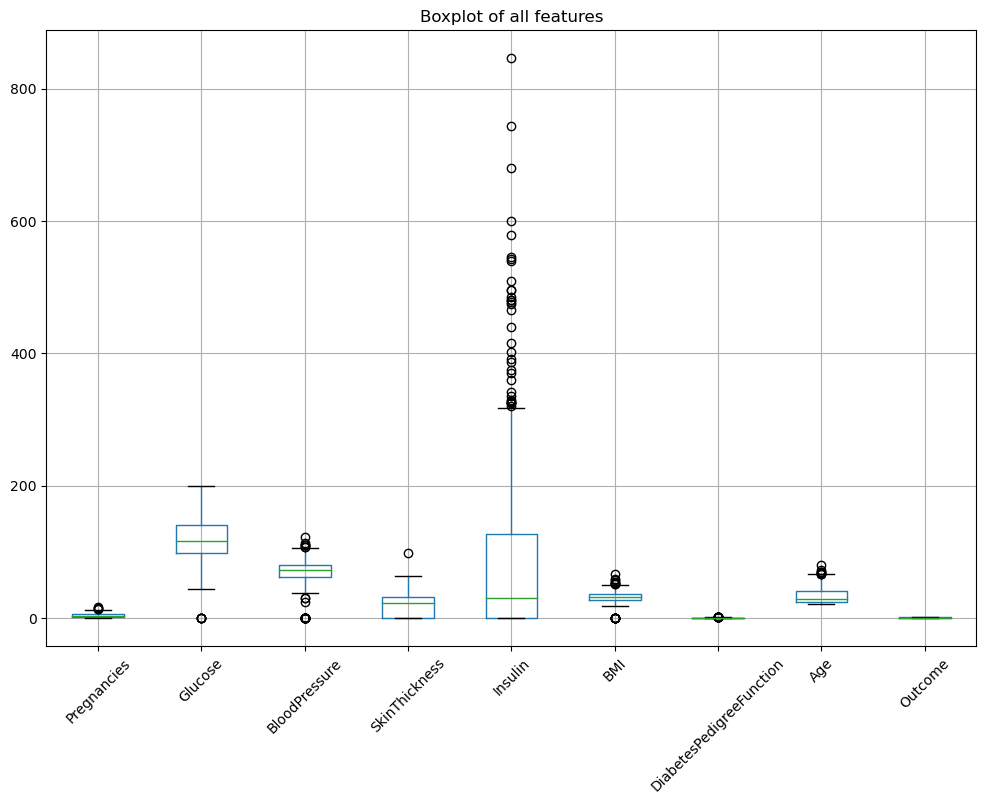

In [7]:
plt.figure(figsize=(12,8))
df.boxplot()
plt.title("Boxplot of all features")
plt.xticks(rotation = 45)
plt.show()

###### Correlation Matrix and Heatmap

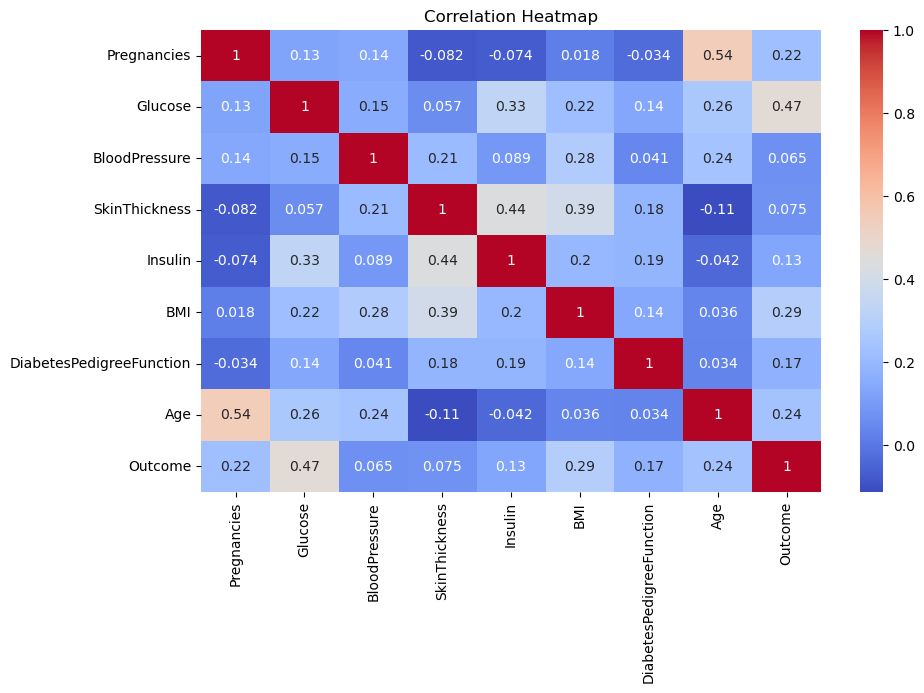

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 2. Data Preprocessing: 

##### a. Handling Missing Values

In [9]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
#Checking how many zeros in each column
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [12]:
#Replacing Only Those Zero Values with NaN
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_missing:
    df[col] = df[col].replace(0, pd.NA)

In [13]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
# Imputing missing values
for col in cols_with_missing:
    df[col] = df[col].fillna(df[col].median())

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


##### b. Encoding Categorical Variables

In [17]:
df = pd.get_dummies(df, drop_first=True) #The only categorical variable is Outcome,But it's already encoded as 0 = No Diabetes, 1 = Diabetes
#So no encoding needed

### 3. Model Building

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##### Spliting the data

In [19]:
X = df.drop("Outcome", axis=1)
y= df['Outcome']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((614, 8), (154, 8), (614,), (154,))

##### Building the model

In [23]:
model = LogisticRegression(max_iter=400)

In [24]:
# trainig the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=400)

### 4. Model Evaluation

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

##### Evaluating the model on Testing Data

In [28]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,-1]

In [29]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [30]:
y_prob

array([0.27221604, 0.16795274, 0.10713052, 0.14698011, 0.46508174,
       0.43627305, 0.01347249, 0.37864289, 0.5815673 , 0.76940708,
       0.222727  , 0.89782294, 0.37912348, 0.2739378 , 0.07570687,
       0.39859873, 0.11131821, 0.0722456 , 0.73380004, 0.58680781,
       0.18680518, 0.07415106, 0.51696646, 0.09353477, 0.56292188,
       0.89102841, 0.10609814, 0.02843227, 0.26411911, 0.10316283,
       0.93105925, 0.86118119, 0.82153131, 0.66432092, 0.56970659,
       0.71925621, 0.97609716, 0.2008855 , 0.45040916, 0.49868489,
       0.06459703, 0.56149894, 0.51136638, 0.30310638, 0.02487596,
       0.55391209, 0.63600437, 0.18994151, 0.32175132, 0.96117463,
       0.03910644, 0.68672263, 0.83584853, 0.24219669, 0.10298144,
       0.03851414, 0.77715486, 0.0470717 , 0.41970254, 0.77137102,
       0.72951019, 0.31579249, 0.18694878, 0.18084657, 0.07513314,
       0.6366335 , 0.03792487, 0.73253257, 0.03280591, 0.7807635 ,
       0.71743569, 0.05208456, 0.15414237, 0.11142162, 0.08336

In [31]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7532467532467533

In [32]:
precision = precision_score(y_test, y_pred)
precision

0.6666666666666666

In [33]:
recall = recall_score(y_test, y_pred)
recall

0.6181818181818182

In [34]:
f1 = f1_score(y_test, y_pred)
f1

0.6415094339622642

In [35]:
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc

0.8211202938475666

##### ROC Curve

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

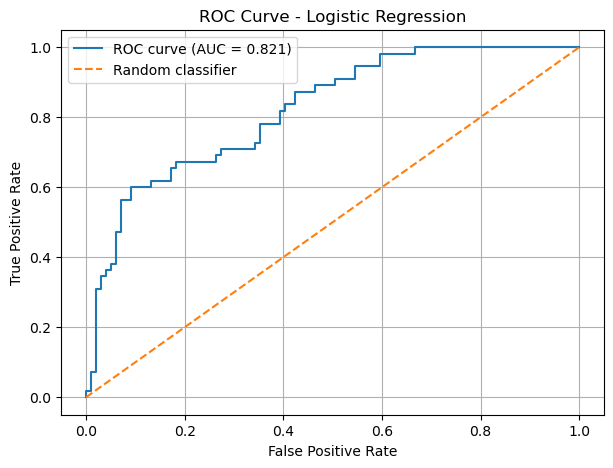

In [37]:
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

### 5. Interpretation

##### coefficients

In [38]:
coef = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})
coef.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
6,DiabetesPedigreeFunction,0.553657
5,BMI,0.101810
0,Pregnancies,0.067623
1,Glucose,0.037336
7,Age,0.034619
3,SkinThickness,0.007703
4,Insulin,-0.001667
2,BloodPressure,-0.013236


##### Significance of features

The most important features influencing the prediction are Glucose, BMI, Age, Diabetes Pedigree Function, and Pregnancies, as higher values in these strongly increase the likelihood of diabetes.

Features like BloodPressure, SkinThickness, and Insulin have comparatively weaker impact due to low variation or many missing/zero values.

Overall, the model relies mainly on glucose level, body weight, age, family history, and pregnancy count to predict diabetes.

In [39]:
import pickle

with open("diabetes_logreg.pkl", "wb") as f:
    pickle.dump(model, f)


### Interview Questions

#### <font color='teal'>Difference Between Precision and Recall</font>

Precision tells us how accurate the positive predictions are, while recall tells us how well the model captures all actual positive cases. Precision avoids false positives, whereas recall avoids false negatives.

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

#### <font color='teal'>What is cross-validation, and why is it important in binary classification?</font>

Cross-validation is a technique that splits the dataset into multiple folds to train and test the model repeatedly. It is important in binary classification because it gives a more reliable accuracy, prevents overfitting, handles data imbalance, and ensures the model generalizes well on unseen data.